In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
data = pd.read_excel('titanic.xls')

In [82]:
#dimension
data.shape
data.columns # les variablesdu dataset
data.head() #les premieres lignes du dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [83]:
#on élémine les colonnes qui nous interesse pas
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [84]:
data.describe() #produit les stats de base pour chaque colomns

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [85]:
#eliminer les lignes avec des données manquant
data = data.dropna(axis=0)

In [86]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [67]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

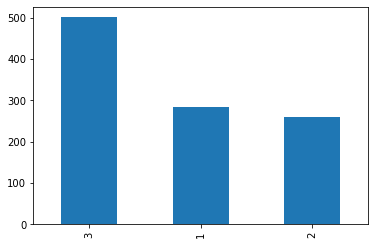

In [68]:
data['pclass'].value_counts().plot.bar()

In [69]:
data['age'].histt()

AttributeError: 'Series' object has no attribute 'histt'

In [70]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

## DataFrames et Series

In [71]:
data['age'][0:10]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [72]:
data['age']<10

0       False
1        True
2        True
3       False
4       False
        ...  
1301    False
1304    False
1306    False
1307    False
1308    False
Name: age, Length: 1046, dtype: bool

In [73]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [74]:
data[data['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [75]:
data.iloc[0:,0:3]

,pclass,survived,sex
0,1,1,female
1,1,1,male
2,1,0,female
3,1,0,male
4,1,0,female
...,...,...,...
1301,3,0,male
1304,3,0,female
1306,3,0,male
1307,3,0,male


In [76]:
data.loc[0:2, 'age'] #meme chose mais sur les colomns

0    29.0000
1     0.9167
2     2.0000
Name: age, dtype: float64

In [77]:
data.loc[0:2, ['age', 'pclass']]

,age,pclass
0,29.0000,1
1,0.9167,1
2,2.0000,1


# Exercice

In [87]:
data[data['age']<20] = 0
data['age']

0       29.0
1        0.0
2        0.0
3       30.0
4       25.0
        ... 
1301    45.5
1304     0.0
1306    26.5
1307    27.0
1308    29.0
Name: age, Length: 1046, dtype: float64

In [88]:
data[(20<=data['age']) & (data['age']<30)] = 1
data[(30<=data['age']) & (data['age']<40)] = 2
data[40<=data['age']] = 3
data['age']

0       1.0
1       0.0
2       0.0
3       2.0
4       1.0
       ... 
1301    3.0
1304    0.0
1306    1.0
1307    1.0
1308    1.0
Name: age, Length: 1046, dtype: float64

In [89]:
data['age'].value_counts()

1.0    344
3.0    245
2.0    232
0.0    225
Name: age, dtype: int64